<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5320_Arnab/blob/main/In_class5_2_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("/content/Data-Week61.csv")
data.head(2)

,ID,street,city,zip,type,beds,baths,sqft,price
0,0,3526 HIGH ST,SACRAMENTO,95838,Residential,2,1,836,59222
1,1,51 OMAHA CT,SACRAMENTO,95823,Residential,3,1,1167,68212


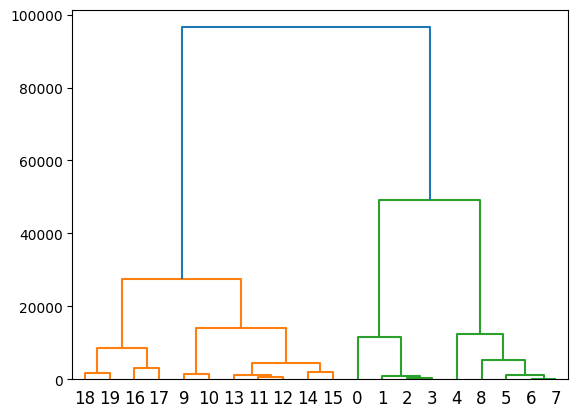

In [7]:
#Predict the price hierarchical clustering for the price of the properties
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

x= data[["price"]].values
link = linkage(x,method='ward',metric='euclidean')
dendrogram(link)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
labels= hc.fit_predict(X_scaled)

data['cluster'] = labels
print(data[['price','cluster']])

     price  cluster
0    59222        2
1    68212        2
2    68880        2
3    69307        2
4    81900        1
5    89921        1
6    90895        1
7    91002        1
8    94905        1
9    98937        0
10  100309        0
11  106250        0
12  106852        0
13  107502        0
14  108750        0
15  110700        0
16  113263        3
17  116250        3
18  120000        3
19  121630        3


In [11]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix

acc = silhouette_score(X_scaled,labels)
acc


np.float64(0.581965083051468)